In [55]:
import os
import random
import urllib
import urllib.request
from zipfile import ZipFile
import matplotlib.pyplot as plt


from lib.model import *
from lib.layers import *
from lib.optimizers import *
from lib.activations import *
from lib.dataset import ImageClassificationDataset
from lib.metrics import Loss_CategoricalCrossentropy, Accuracy_Categorical

In [56]:
URL = 'https://balintdaniel.com/cloud/index.php/s/ZTMfTmKyj7y5XTJ/download?path=%2Fdatasets&files=binary_classification_dataset.zip'
FILE = 'binary_classification_dataset.zip'

if not os.path.isfile(FILE):
    print(f'Downloading {URL} and saving as {FILE}...')
    urllib.request.urlretrieve(URL, FILE)

print('Unzipping images...')
with ZipFile(FILE) as zip_images:
    zip_images.extractall("./")
print('Done!')

Unzipping images...
Done!


In [57]:
dataset = ImageClassificationDataset()
dataset.load(
    "binary_classification_dataset", 
     size=28,
     binary=True
)

dataset.augment()
dataset.balance()
dataset.preprocess(
     white_balance = True     
)
dataset.shuffle()
dataset.normalize()
dataset.reshape()

X_train, y_train, X_valid, y_valid, X_test, y_test = dataset.split()

Train batch contains 9_800 images
Validation batch contains 2_800 images
Test batch contains 1_400 images


/home/deni/.local/lib/python3.10/site-packages/matplotlib/text.py:1241: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


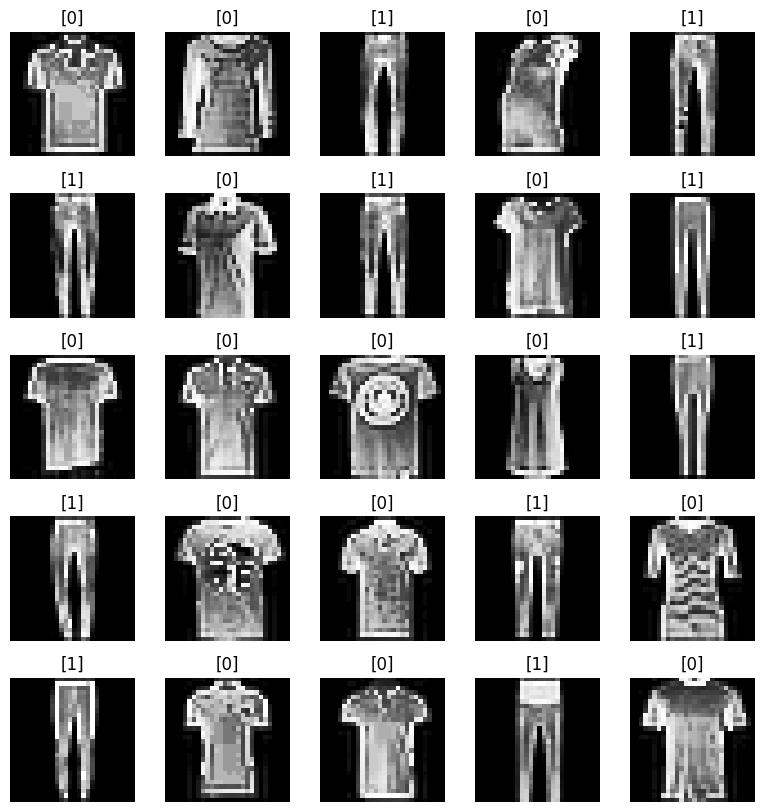

In [58]:
dataset.visualize_dataset_preview()

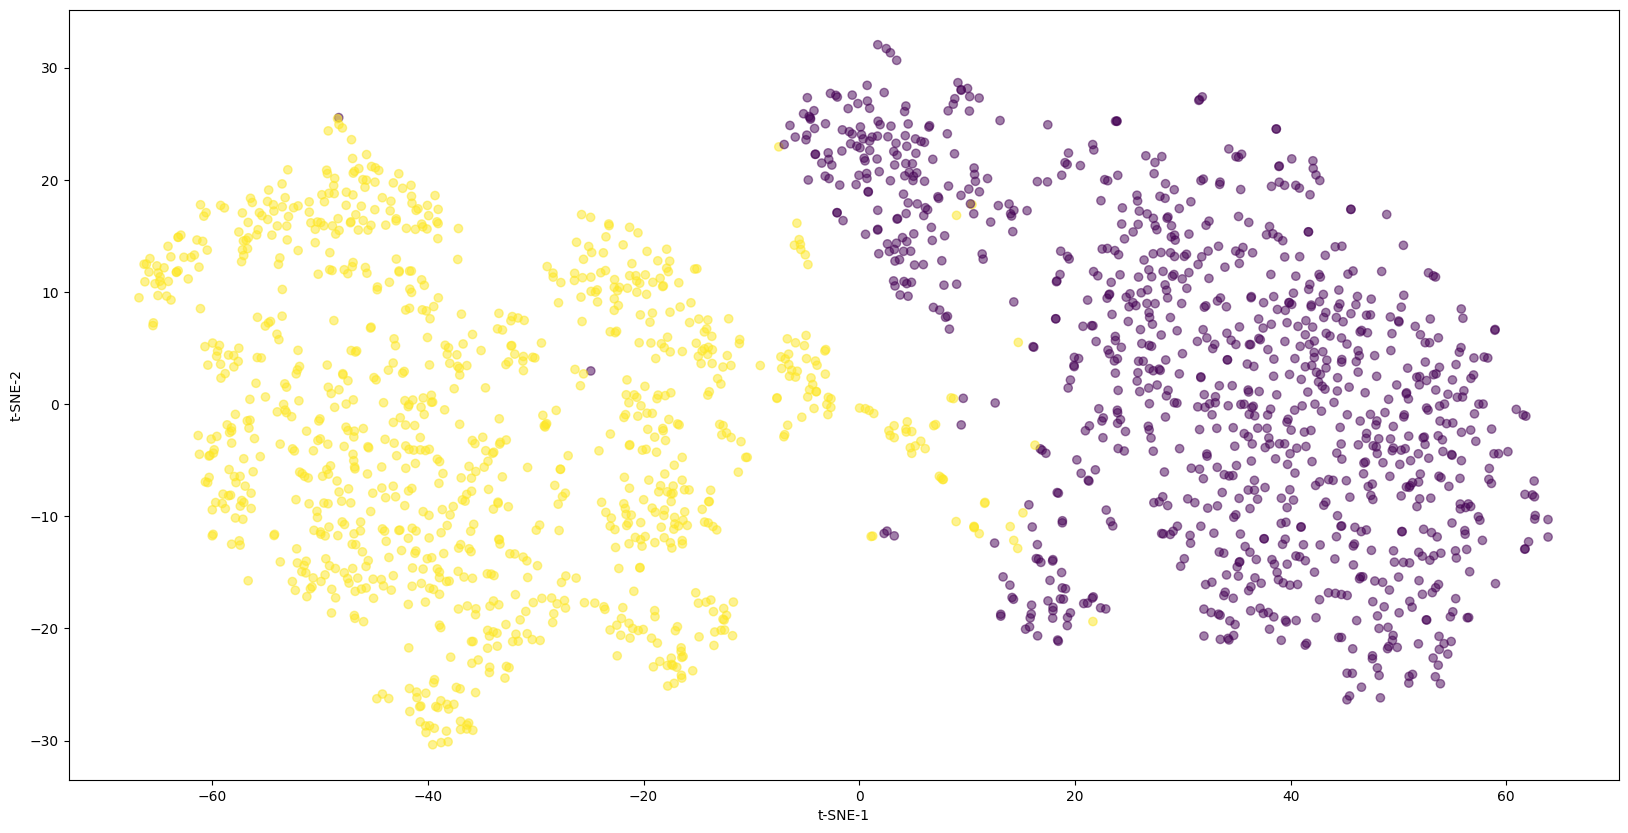

In [59]:
dataset.visualize_dataset()

In [60]:
model = Model()

model.add(Layer_Dense(X_train.shape[1], 64))
model.add(Activation_ReLU())
model.add(Layer_Dense(64, 64))
model.add(Activation_ReLU())
model.add(Layer_Dense(64, 1))
model.add(Activation_Sigmoid())

model.set(
    loss=Loss_BinaryCrossentropy(),
    optimizer=Optimizer_Adam(learning_rate=0.001, decay=0.001),
    accuracy=Accuracy_Categorical(binary=True)
)

model.finalize()

model.train(
    X_train,
    y_train, 
    validation_data=(X_valid, y_valid),
    epochs=100, 
    batch_size=64
    ,early_stop=5
)

Epoch(1/100), Training:   accuracy: 0.969, loss: 0.146, learning rate: 0.000867302688638, data loss: 0.146, regularization loss: 0.00000
Validation: accuracy: 0.981, loss: 0.045 

Epoch(2/100), Training:   accuracy: 0.986, loss: 0.038, learning rate: 0.000765110941086, data loss: 0.038, regularization loss: 0.00000
Validation: accuracy: 0.983, loss: 0.042 

Epoch(3/100), Training:   accuracy: 0.989, loss: 0.031, learning rate: 0.000684462696783, data loss: 0.031, regularization loss: 0.00000
Validation: accuracy: 0.985, loss: 0.038 

Epoch(4/100), Training:   accuracy: 0.991, loss: 0.026, learning rate: 0.000619195046440, data loss: 0.026, regularization loss: 0.00000
Validation: accuracy: 0.986, loss: 0.036 

Epoch(5/100), Training:   accuracy: 0.993, loss: 0.022, learning rate: 0.000565291124929, data loss: 0.022, regularization loss: 0.00000
Validation: accuracy: 0.988, loss: 0.033 

Epoch(6/100), Training:   accuracy: 0.994, loss: 0.018, learning rate: 0.000520020800832, data loss:

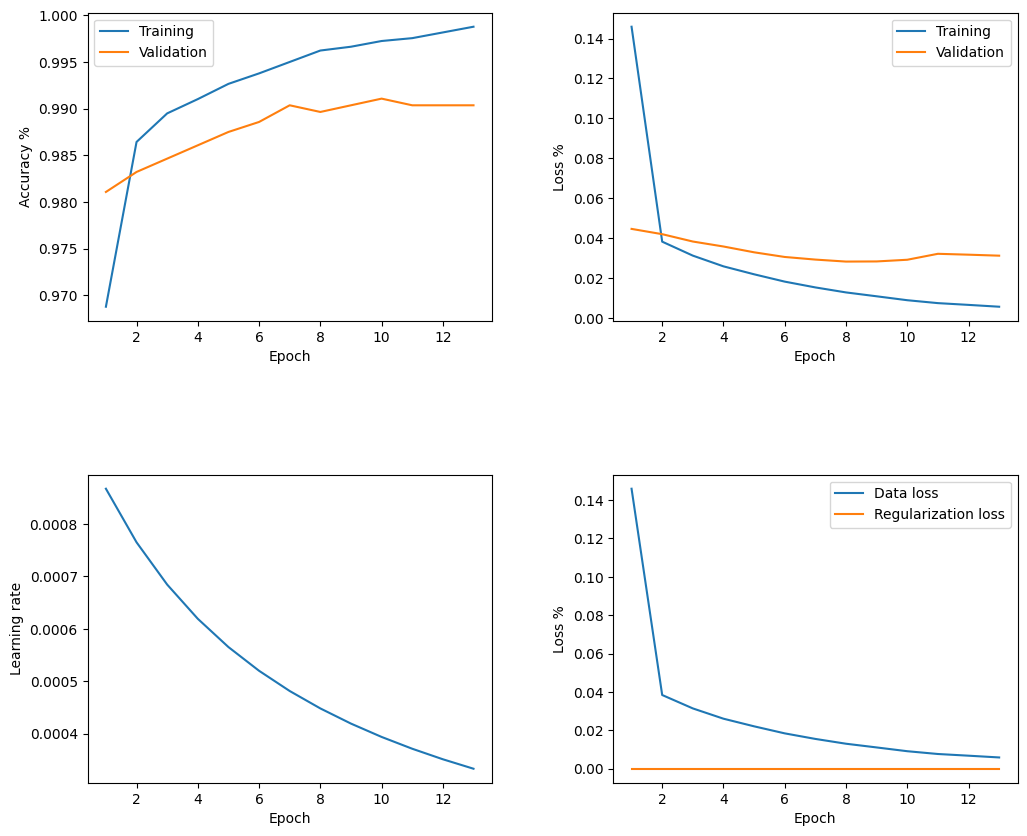

In [61]:
model.visualize_train()

In [62]:
model.evaluate(X_test, y_test) # Use test set

Validation: accuracy: 0.990, loss: 0.032 



(0.99, 0.031553233775047616)

In [63]:
model.save("model.m")
model = Model.load("model.m")

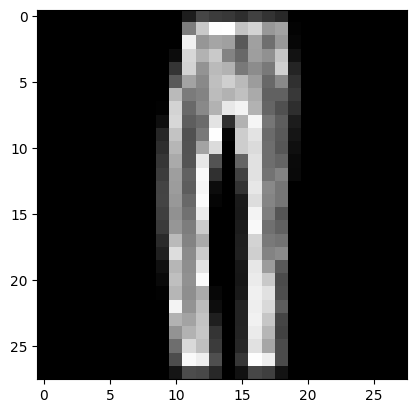

Prediction: [1], True: [1]
Trouser


In [74]:
fashion_mnist_labels = {
    0: 'T-shirt/top',
    1: 'Trouser'
}

img = random.randint(0, len(X_test)-1) # Random image from test batch

plt.imshow((X_test[img].reshape(28, 28)), cmap='gray')
plt.show()

prediction = model.predict(X_test[img])[0] # Pass image(s) in array
print(f"Prediction: {prediction}, True: {y_test[img]}")

print(fashion_mnist_labels[prediction[0]])